# Coding Assignment
### Rey, Charles Arthel Rey

### Assignment 1

In Assignment No. 1, the task is to extract the blocks of text from a page in a PDF. One of the challenges when handling PDF is that digitized characters (text blocks, tables, figures) tend to be disorganized when extracted. One technique that can be used is converting the page into its jpeg counterpart. From there, text blocks will be located, cropped, and image processing techniques will be used to extract the text. Specifically, optical character recognition can be used. 

In this assignment, however, the texts are written using a very small font size. The font color is also not very prominent, thus, my initial approach to convert into jpeg and draw bounding boxes did not work. Alternately, I extracted the texts using PyMuPDF library. The result is a single column string. 

The problem at this point is that the texts are written in a single paragraph, when the original text is divided into several paragraphs. In this case, I used a rules-based approach derived from patterns in natural language. In the given page, it is notable that periods followed by a new line ("\n") means that the next line belongs to a new paragraph. I used this observation. Post processing is done to mimic the division of sentences of the original text. 

Lastly, the paragraphs are stored as a single string. It was transfered to an excel file. 



In [2]:

file  = r"C:\Users\Charles Arthel Rey\Downloads\keppel-corporation-limited-annual-report-2018.pdf"

""" Assignment # 1 """

import fitz
from openpyxl import Workbook

def stringToList(string):
    listRes = list(string.split("\n\n"))
    return listRes

#extract text from the page
doc = fitz.open(file)
page = doc.load_page(11)
pymupdf_text = page.getText()
pymupdf_text = pymupdf_text.replace(". \n", ". \n\n") # this code breaks the sentences per line
pymupdf_text = pymupdf_text.replace(".\n", ". \n\n")

jotdown = ["\n\nStarting", "\n\nWith the burgeoning", "\n\nUrbanFox", "\n\nKeppel Infrastructure Trust", "\n\nWe continued to drive", "\n\nWith\xa0the Eco-City’s"]


# this code will join the sentences belonging to a single paragraph, but were wrongfully separated into two paragraphs
for item in jotdown:
    pymupdf_text = pymupdf_text.replace(item, item[2:])

# this code deletes this specific line    
pymupdf_text = pymupdf_text.replace("\n1\nKeppel Land expanded \nits presence in China \nin 2018 entering a new \nmarket with\xa0a residential \nland\xa0plot\xa0in Nanjing. \n\n2\nKeppel O&M’s proprietary \nRigCare Solution, \nimplemented for the \nfirst\xa0time on Cantarell IV, \nwill enhance the efficiency, \nsafety and operability of \nthe jackup rig. \n\n", "")

#this code initializes the excel file
wb = Workbook()
sheet = wb.active
# this code divides the string into a list where each item is a paragraph
strings = stringToList(pymupdf_text)
for i in range(len(strings)):
    strings[i] = strings[i].replace(" \n", " ")
    c = sheet.cell(row = i+1 , column = 1)
    c.value = strings[i]

print("\n\n".join(strings))
wb.save('Rey,Charles_PythonAssign1.xlsx')

While pursuing new markets and opportunities, we are growing our stable and recurring income from the quality operations and maintenance services provided by Infrastructure Services. 

Keppel Electric has been the largest electricity retailer in Singapore in terms of market share in the commercial and industrial sector. Following the launch of the Open Electricity Market (OEM) in Singapore, Keppel Electric is also making headway into the housing electricity market. Starting from 1 November 2018, the OEM is being progressively extended to all consumers across Singapore by zones. The response to Keppel Electric’s retail offerings for households has been encouraging, with preliminary results showing that it is among the retailers with the largest market shares in the OEM. 

Keppel T&T is scaling up its logistics and data centre solutions to tap opportunities created by the fast-growing digital economy. With the burgeoning growth of cloud service providers as well as increasing storage and

This is the resulting file:
    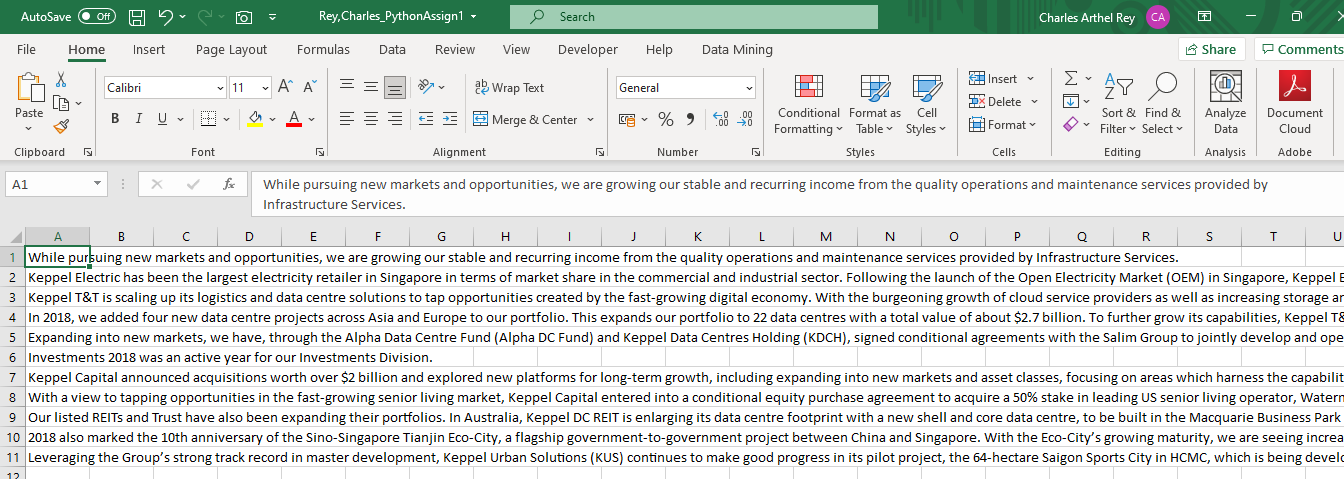
    

### Assignment 2

In Assignment No. 2, the task is to extract the table. One technique to address this task is to convert the page into document image (jpeg), run a DNN to locate the table, then mark the table using a bounding box. However, a more straightforward approach can be used using tabula. Tabula is a library can locate and extract the table directly from a page in a PDF. 

However, the challenge came in the post processing when the dataframe extracted did not conform to the original format of the table. Hence, it was manipulated to mimic the original format of the table before it was transfered to excel. 

In [7]:
""" Assignment # 2 """

import tabula

table = tabula.read_pdf(file, pages=69)
table = (table[0])


"""table1 = table.iloc[:1]
table2 = table.iloc[1:]
list_un2 = list(table['Unnamed: 2'])

for i in range(1, len(list_un2)):
     list_un2[i]= list_un2[i].replace(" ", ",")
"""
     
table[['Nomination' ,'Remuneration']] = table['Unnamed: 2'].str.split(" ", 1, expand=True)

table['Unnamed: 2'] = table['Nomination']
table.insert(4, 'Remuneration2', table['Remuneration'])
table.drop(columns = ['Nomination','Remuneration'], axis="columns", inplace=True)

table.columns = [" " if i > 1 else x for i, x in enumerate(table.columns, 1)]


table.to_excel("Rey,Charles_PythonAssign2.xlsx")


Here is the resulting file:
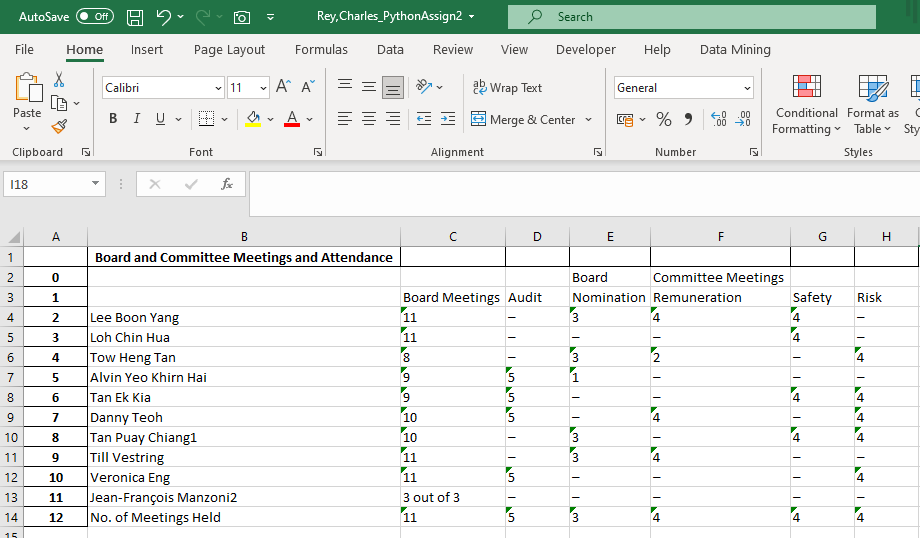

### Assignment 3

In Assignment No. 3, the task is to create a customized Named Entity Recognition System that recognizes named entities in a string. My initial approach was to use Spacy, so I preprocessed the given dataset to become the format needed for Spacy. The challenge here is that, training the model will consume much time -- making it less efficient. Ultimately, I used the Bidirectional Encoder Representations from Transformers (BERT) to make my NER. 

BERT is a transformer based language model that was pretrained on various NLP tasks. Costumizing BERT for this downstream task only requires a superimposition of a layer to fine-tune the model for NER. Since it was already pretrained, fine-tuning the model will require only a small amount of time (I only did 1 epoch, for brevity of the process). 

##### Accuracies: 
Training: loss: 1.0102 - accuracy: 0.7254
Validation:  loss: 0.9872 - accuracy: 0.7589

In [9]:


""" Assignment # 3 """


# dataset preprocessing

corpus = open(r"C:\Users\Charles Arthel Rey\Downloads\restauranttrain.bio.txt")
trans_corpus = ""
# this code extracts text from text file, corpus.
for line in corpus:
    trans_corpus = trans_corpus + line

# this code divides the string file per sentence 
trans_corpus = list(trans_corpus.split("\n\n")) # the goal is to make each item in this list equivalent to one sentence.   
ftrans_corpus = []
for i in range(len(trans_corpus)):
    trans_corpus[i] = list(trans_corpus[i].split("\n"))
    tups = []
    for item in trans_corpus[i]:
        tups.append(tuple(item.split("\t")))
    
    trans_corpus[i] = (tups)

trans_corpus = [ele for ele in trans_corpus if len(ele) > 1]

sentences = []
all_entities = []
for grplist in trans_corpus:
    single_sentence = []
    single_entities = []
    for tups in grplist:
        single_sentence.append(tups[1])
        if tups[0] == 'O':
            del tups
        else:
            single_entities.append(tups)
    
    sentences.append(" ".join(single_sentence))
    all_entities.append(single_entities)
    
Train_Entities = []
for i in range(len(all_entities)):
    entities = []
    for tuples in all_entities[i]:
        index = (sentences[i].index(tuples[1]), sentences[i].index(tuples[1])+len(tuples[1]), tuples[0])
        entities.append(index)

    Train_Entities.append(entities)

# this code aims to delete all items has no entities in its sentence

all_entities = [ele for ele in all_entities if Train_Entities[all_entities.index(ele)] !=  []]
sentences = [ele for ele in sentences if Train_Entities[sentences.index(ele)] !=  []]
Train_Entities =  [ele for ele in Train_Entities if ele != []] 

TRAIN_DATA = []
for i in range(len(Train_Entities)):
    train_tups = (sentences[i], {'entities': Train_Entities[i]})
    TRAIN_DATA.append(train_tups)

# printing out a sample: first 250 items
  
# TRAIN_DATA now follows the format of the dataset required to be fed to Spacy.


print(TRAIN_DATA[1:250])

[('5 star resturants in my town', {'entities': [(0, 1, 'B-Rating'), (2, 6, 'I-Rating'), (18, 20, 'B-Location'), (21, 23, 'I-Location'), (24, 28, 'I-Location')]}), ('98 hong kong restaurant reasonable prices', {'entities': [(3, 7, 'B-Restaurant_Name'), (8, 12, 'I-Restaurant_Name'), (24, 34, 'B-Price')]}), ('a great lunch spot but open till 2 a m passims kitchen', {'entities': [(23, 27, 'B-Hours'), (28, 32, 'I-Hours'), (33, 34, 'I-Hours'), (0, 1, 'I-Hours'), (37, 38, 'I-Hours'), (39, 46, 'B-Restaurant_Name'), (47, 54, 'I-Restaurant_Name')]}), ('a place that serves soft serve ice cream', {'entities': [(20, 24, 'B-Dish'), (13, 18, 'I-Dish'), (31, 34, 'I-Dish'), (35, 40, 'I-Dish')]}), ('a restaurant that is good for groups', {'entities': [(21, 25, 'B-Rating'), (26, 29, 'B-Amenity'), (30, 36, 'I-Amenity')]}), ('a salad would make my day', {'entities': [(2, 7, 'B-Dish')]}), ('a smoothie would hit the spot', {'entities': [(2, 10, 'B-Cuisine')]}), ('a steak would be nice', {'entities': [(2, 7, 

#### I stopped implementing NER using Spacy here. Instead, I implemented a BERT Based NER.

In [10]:
# Dataset Preprocessing

import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
import numpy as np
import nltk
from sklearn.model_selection import train_test_split



TOKENIZER = AutoTokenizer.from_pretrained("bert-base-cased")
BERT = TFAutoModel.from_pretrained("bert-base-cased")


BERT_TRAIN_DATA = [x for l in trans_corpus for x in l]
tags0 = dict(enumerate((set([ele[0] for ele in BERT_TRAIN_DATA]))))
tags = {v: k for k, v in tags0.items()}

train_ds, test_ds = train_test_split(BERT_TRAIN_DATA, test_size=0.20, random_state=42)


SEQ_LEN = 20

def tokenize(sentence):
    
    tokens = TOKENIZER.encode_plus(sentence, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    tokenss = TOKENIZER.tokenize(sentence)
    return tokens['input_ids'], tokens['attention_mask'], tokenss

def INITIALIZE(_ds):
    all_text = []
    all_tags = []
    for tupl in _ds:
        all_text.append(tupl[1])
        all_tags.append(tupl[0])

    all_tags = [tags[x] for x in all_tags]

    arr = np.array(all_tags)  # take sentiment column in df as array
    labels = np.zeros((arr.size, arr.max()+1))  # initialize empty (all zero) label array
    labels[np.arange(arr.size), arr] = 1  # add ones in indices where we have a value
    
    # initialize two arrays for input tensors
    Xids = np.zeros((len(all_text), SEQ_LEN))
    Xmask = np.zeros((len(all_text), SEQ_LEN))
    sentence_tokens = []

    # loop through data and tokenize everything
    for i, sentence in enumerate(all_text):
        Xids[i, :], Xmask[i, :], tokens = tokenize(sentence)
        sentence_tokens.append(tokens)

    # create tensorflow dataset object
    dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

    # restructure dataset format for BERT
    def map_func(input_ids, masks, labels):
        return {'input_ids': input_ids, 'attention_mask': masks}, labels
  
    dataset  = dataset.map(map_func)  # apply the mapping function
    
    return dataset.shuffle(10000).batch(32)

dataset_train = INITIALIZE(train_ds)
dataset_test = INITIALIZE(test_ds)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [11]:
# Builing the BERT Model


# build the model
input_ids = tf.keras.layers.Input(shape=(50,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(50,), name='attention_mask', dtype='int32')

embeddings = BERT(input_ids, attention_mask=mask)[0]  # we only keep tensor 0 (last_hidden_state)

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)  
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(17, activation='softmax', name='outputs')(X)  

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer
model.layers[2].trainable = False

# compile the model
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [13]:
# Training the Model

history = model.fit(dataset_train, epochs = 1)

1763/1763 [==============================] - 4023s 2s/step - loss: 1.0102 - accuracy: 0.7254


In [14]:
# Evaluating the model

test_loss, test_acc = model.evaluate(dataset_test, verbose = 2)

441/441 - 938s - loss: 0.9872 - accuracy: 0.7589


In [15]:
# this code will predict the entities when inputting a text. 

def Prediction(text):
    predicts = nltk.word_tokenize(text)

    # initialize two arrays for input tensors
    Xids_pred = np.zeros((len(predicts), SEQ_LEN))
    Xmask_pred = np.zeros((len(predicts), SEQ_LEN))
    sentence_tokens_pred = []

    # loop through data and tokenize everything
    for i, sentence in enumerate(predicts):
        Xids_pred[i, :], Xmask_pred[i, :], tokens_pred = tokenize(sentence)
        sentence_tokens_pred.append(tokens_pred)
    
    pred = model.predict({'input_ids':Xids_pred, 'attention_mask': Xmask_pred})
    pred = np.argmax(pred, axis = 1)
    results = []
    for item in pred:
        results.append(tags0[item])
    
    return results

#sample prediction

pred = Prediction("During quanrantine, it is not allowed to dine inside Jollibee")
print(pred)

['O', 'O', 'I-Restaurant_Name', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Amenity', 'B-Restaurant_Name']
